In [2]:
from algorithms.sort import quick_sort
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd 
from scipy import stats
import seaborn as sns
from sklearn import svm 
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV 
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler 
from sklearn.svm import SVC 
from sklearn.utils import shuffle
from random import randint
import statistics
import time
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

## ***NOTE***: 
I have suppressed/removed my code outputs for this notebook per algo/dataset. This is to shorten the output of my notebook from what would be 548 pages to somewhere under 40.  


## Importing The Datasets:

Before we go any further, lets print the heads of our datasets so we can see what we are working with!

In [2]:
# Importing Dry Bean DataSet.
beanData = pd.read_excel('Dry_Bean_Dataset.xlsx')

# Importing the Skin_NonSkin dataset.
skinData = pd.read_excel('skin_NonSkin1.xlsx')

#Importing the Adult dataset.
adultData = pd.read_csv("adult.data")

# Importing the Letter dataset.
letterData = pd.read_csv("letter-recognition.data")

In [3]:
# Showing first five rows of the beanData dataset.
beanData.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


In [4]:
# Showing first five rows of the skinData dataset.
skinData.head()

,74,85,123,1
0,73,84,122,1
1,72,83,121,1
2,70,81,119,1
3,70,81,119,1
4,69,80,118,1


In [5]:
# Showing first fiver rows of the adultData dataset.
adultData.head()

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [6]:
# Showing first fiver rows of the letter dataset.
letterData.head()

,T,2,8,3,5,1,8.1,13,0,6,6.1,10,8.2,0.1,8.3,0.2,8.4
0,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
1,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
2,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
3,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10
4,S,4,11,5,8,3,8,8,6,9,5,6,6,0,8,9,7


## Data Cleaning:

As you can see, most of these datasets are in no condition to just start running classification algorithms on. Some have no binary classification column, others have a wide mix of strings and numerical values, and some don't even have their correct column names. I will have to clean them up and give each of them at least one binary column to perform my calculations on. 

In [ ]:
## Cleaning beanData:
# First, I will drop the "class" column from the Dry Bean Dataset. It serves 
# no purpose for our calculations as I will be using Area column for my 
# predictions.
beanData = beanData.drop('Class', axis = 1)
# Next, I find the median of the Area column.
med = statistics.median(beanData['Area'])
# Using this median, I set any value above it to 1, and any value 
# below it to 0.
beanData['Area'] = beanData['Area'].mask(beanData['Area'] > med, 1)
beanData['Area'] = beanData['Area'].mask(beanData['Area'] > 1, 0)


## Cleaning skinData:
# shuffling skin data so class column contain both skin and non skin data.
skinData = shuffle(skinData)
# Selecting only the first 50,859 attributes of skinData to classify. 
skinData = skinData[1:50860] 
# Giving skinData the correct column names it's supposed to have 
# (by default it has none).
skinData.columns = ['R', 'G', 'B', 'Y']


## Cleaning adultData:
# Giving adultData the correct column names it's supposed to have 
# (when i inported it, it had none).
adultData.columns = ['age', 'workclass', 'fnlwgt', 'education', 
                     'education-num', 'marital-status', 'occupation', 
                     'relationship', 'race', 'sex', 'capital-gain', 
                     'capital-loss', 'hours-per-week', 'country', 
                     'salary']
# Defining adultData as a list which I will use later on in cleaning.
df_list = [adultData]

# Encoding >50K string as a 0 and <=50K string as a 1 in the salary 
# column using the map function.
salaryDict={' <=50K': 1,' >50K': 0}
adultData['salary'] = adultData['salary'].map(salaryDict).astype(int)

# Encoding Male as 1 and Female as 0 in the sex column using the map function.
adultData['sex'] = adultData['sex'].map({' Male':1,' Female':0}).astype(int)

# Replacing any missing data from the country column as a numpy NaN.
adultData['country'] = adultData['country'].replace(' ?', np.nan)
# Replacing any missing data from the workclass column as a numpy NaN.
adultData['workclass'] = adultData['workclass'].replace(' ?', np.nan)
# Replacing any missing data from the occupation column as a numpy NaN.
adultData['occupation'] = adultData['occupation'].replace(' ?', np.nan)
adultData.dropna(how = 'any', inplace = True)

# Turning adultData into a list to assign universal names to the different 
# strings in that column using loc. 
for countries in df_list:
    countries.loc[countries['country'] != ' United-States', 'country'] 
    = 'Other_Countries'
    countries.loc[countries['country'] == ' United-States', 'country'] 
    = 'United_States'
    
# Assigning 1 to the universalized UnitedStates string and 0 to the others.
adultData['country'] = adultData['country'].map({'United_States': 1,
                                                 'Other_Countries':0}).astype(int)

# Turning different strings in the marital-status column to two universal 
# strings: Single and Dating. 
adultData['marital-status'] = adultData['marital-status'].replace(
    [' Divorced',' Married-spouse-absent',' Never-married',' Separated', 
     ' Widowed'], 'Single')
adultData['marital-status'] = adultData['marital-status'].replace(
    [' Married-AF-spouse',' Married-civ-spouse'], 'Dating')
# Assigning the two universalized variables equal to 0 if they're dating 
# and 1 if they're single.
adultData['marital-status'] = adultData['marital-status'].map({'Dating': 0,
                                                               'Single': 1})

# Creating a dictionary where strings are encoded as numerical values, 
# and use it in a map function for relationship.
relationshipDict = {' Unmarried': 0,' Wife': 1,' Husband': 2,
                    ' Not-in-family': 3,' Own-child': 4,
                    ' Other-relative': 5}
adultData['relationship'] = adultData['relationship'].map(relationshipDict)

# Creating a dictionary where strings are encoded as numerical values, 
# and use it in a map function for race.
raceDict = {' White':0,' Amer-Indian-Eskimo':1,
            ' Asian-Pac-Islander':2,' Black':3,' Other':4}
adultData['race']= adultData['race'].map(raceDict)

# Creating a function which will go through inputs of a column, 
# and assign every string to a universalizing term. 
def categorize(i):
    if i['workclass'] == ' Federal-gov' 
    or i['workclass'] == ' Local-gov' 
    or i['workclass'] ==' State-gov': 
        return 'government'
    elif i['workclass'] == ' Private': 
        return 'private'
    elif i['workclass'] == ' Self-emp-inc' 
    or i['workclass'] == ' Self-emp-not-inc': 
        return 'self_employed'
    else: 
        return 'unemployed'

# For some reason the workclass column was giving me trouble when I tried to 
# override it with the new strings. To save precious time and go around hours 
# of debugging, I'll just run the function on a new column job_type, and 
# remove workclass column later. This will transfer all of the new data to 
# a new column with a new name. 
adultData['job_type'] = adultData.apply(categorize, axis = 1)
employmentDict = {'government': 0, 'private': 1, 'self_employed': 2, 
                  'unemployed': 3}
adultData['job_type'] = adultData['job_type'].map(employmentDict)

# Dropping workclass, education, and occupation columns as they don't serve 
# a purpose to my analysis. 
adultData.drop(labels=['workclass','education','occupation'], 
               axis = 1, inplace = True)

# Finally, using loc on capital-gain column to assign 1 to values higher than 
# 0, and leaving 0 as 0.
adultData.loc[(adultData['capital-gain'] > 0),'capital-gain'] = 1
adultData.loc[(adultData['capital-gain'] == 0 ,'capital-gain')]= 0


## Cleaning out letterData.
# Assigning the correct column names to the dataset 
# (when I imported it, none came with it.)
letterData.columns = ['letter', 'x-box', 'y-box', 'width', 'high', 'onpix', 
                      'x-bar', 'y-bar', 'x2bar', 'y2bar', 'xybar', 'x2ybr', 
                      'xy2b', 'x-ege', 'xegvy', 'y-ege', 'yegvx']

letterData['letter'] = letterData['letter'].replace(['A','B','C','D','E','F',
                                                     'G','H','I','J','K','L',
                                                     'M'], 'FirstHalf')
letterData['letter'] = letterData['letter'].replace(['N','O','P','Q','R','S',
                                                     'T','U','V','W','X','Y',
                                                     'Z'], 'SecondHalf')

# Assigning the two universalized variables equal to 0 if they're dating and 
# 1 if they're single.
letterData['letter'] = letterData['letter'].map({'FirstHalf': 0,
                                                 'SecondHalf': 1})

## The Analysis:

For this section, what I did was create a massive for loop which ran through 10 iterations (Trials). What I did next is slightly different than the CNM06 paper. Essentially, instead of randomly choosing 5000 datapoints per trial to split for training/testing, what I did was for each one of those iterations, I had my code split my data into 4 different brackets of training and testing ( 80/20, 70/30, 60/40, and 50/50). This gave me much larger data samples to work with and increased my statistical power by physically having more data to work with, thus giving me more accurate results. To eliminated the worry of selecting 5000 data points, I only got datasets that were at the minimum, 10,000 instances. Thus, when I split my data into 80/20, 70/30, 60/40, and 50/50, I would have more than 5000 data points for those iterrations per trial. Thus, since all 4 of my splits were over 5,000 points, I can say I not only met the project requirements but also did more training!

Afterwards, for each split my data has, my loop would take that Xtrain and Ytrain and run my four algorithms on them. As for my algorithms, I chose to do three of them: Decision Trees, SVMs, and Random Forests. I used sklearn for each algorithm and used their code to let pyton choose the best parameters for each iteration! I will repeat this loop 4 times for the 4 different datasets, and record their average scores across accuracy, fi-score, mean, precision, and more. 

The majority of the code I will be using will come from the homework assignments on said algorithms, as well as code/content we discussed in lectures/ discussions. The other place I refered to for learning how to do some of these algorithms and packages is the scikit-learn website, which I will link in my references. 

By the end of all this, my algorithm would have run 10 iteration x 4 different data splits x 3 algorithms x 4 datasets which equals a total of 480 trials! (Compared to the 80 trials needed for the project). 

### Dry Bean Dataset:

In [ ]:
# The following code in this block is for my Dry Bean Dataset:

# We begin by making a massive for-loop to go through 10 trials.
for iterations in range(10):
    
    # Shuffling the dataset.
    beanData = shuffle(beanData) 
    
    # Setting up X values to be all variables except the area, and Y values to 
    # be the area column.
    X = beanData.drop('Area', axis = 1)  
    Y = beanData['Area'] 
    
    # Printing the number of each iteration as we go up.
    print("Trial Number:", iterations + 1)  

    
    # Setting up a for loop within my iterations loop, which will split my 
    # data 4 times, in different ways.
    for split in range(4):
        if split == 0:
            # For the first split, I will do a 80(training)/20(testing) 
            # split, with a Random State of 50.
            X_train, X_test, Y_train, Y_test = 
            train_test_split(X, Y, test_size = 0.2, random_state = 50)
            
            # Standardizing features by removing the mean and scaling to a 
            # unit variance.
            stsc = StandardScaler() 
            
            # Transforming X train and X test based on the 
            # standardization above.
            X_train = stsc.fit_transform(X_train)
            X_test = stsc.fit_transform(X_test)
            print("Data Split 80/20:")
        
        if split == 1:
            # For the second split, I will do a 70(training)/30(testing)
            # split, with a Random State of 50.
            X_train, X_test, Y_train, Y_test = 
            train_test_split(X, Y, test_size = 0.3, random_state = 50)
            
            # Standardizing features by removing the mean and scaling to a 
            # unit variance.
            stsc = StandardScaler() 
            
            # Transforming X train and X test based on the 
            # standardization above.
            X_train = stsc.fit_transform(X_train) 
            X_test = stsc.fit_transform(X_test)
            print("Data Split 70/30:")

        if split == 2:
            # For the third split, I will do a 60(training)/40(testing) 
            # split, with a Random State of 50.
            X_train, X_test, Y_train, Y_test = 
            train_test_split(X, Y, test_size = 0.4, random_state = 50)
            
            # Standardizing features by removing the mean and scaling to a 
            # unit variance.
            stsc = StandardScaler() 
            
            # Transforming X train and X test based on the 
            # standardization above.
            X_train = stsc.fit_transform(X_train) 
            X_test = stsc.fit_transform(X_test)
            print("Data Split 60/40:")
            
        if split == 3:
            # For the fourth split, I will do a 50(training)/50(testing) 
            # split, with a Random State of 50.
            X_train, X_test, Y_train, Y_test = 
            train_test_split(X, Y, test_size = 0.5, random_state = 50)
            
            # Standardizing features by removing the mean and scaling to a 
            # unit variance.
            stsc = StandardScaler()
        
            # Transforming X train and X test based on the 
            # standardization above.
            X_train = stsc.fit_transform(X_train) 
            X_test = stsc.fit_transform(X_test) 
            print("Data Split 50/50:")

            
        # Setting up a for-loop for my 3 algorithms. 
        for alg in range(3):
            ## The first group of algorithms will be Decision Trees .
            if alg == 0:
                # The first will be a Decision Tree with entropy.
                # Setting a list for depth length and creating a Classifier 
                # with entropy.
                Depth_list = [1, 4, 8, 16] 
                classifierENT = tree.DecisionTreeClassifier(criterion = 
                                                            'entropy') 
                
                # Here, I will select hyperparameters via a systematic 
                # gridsearch, with a cross validation score of 10 and 
                # scoring method set to accuracy:
                GridSearchENT = GridSearchCV(classifierENT, 
                                             {'max_depth':Depth_list},
                                             scoring = 'accuracy', 
                                             cv = 10, n_jobs = -1)
                GridSearchENT.fit(X_train, Y_train)
                
                # Creating a classifier that will take in the GridSearchTree 
                # as its Max Depth parameter to find it the best 
                # parameters.
                classifier_ENT = 
                tree.DecisionTreeClassifier(criterion = 'entropy', 
                                            max_depth = GridSearchENT.best_params_['max_depth'])
    
                # Creating testing and training precitions based on my 
                # fitted X and Y trains.
                classifier_ENT.fit(X_train, Y_train) 
                prediction_ENT = classifier_ENT.predict(X_test) 
                prediction_ENTtr = classifier_ENT.predict(X_train)
                
                # Printing the training and testing classification reports.
                print("Classification report of Test DT (entropy):", 
                      classification_report(Y_test, prediction_ENT))
                print("Classification report of Train DT (entropy):", 
                      classification_report(Y_train, prediction_ENTtr))
                
                # The second will be a Decision Tree with gini.
                # Setting a list for depth length and creating a Classifier 
                # with gini.
                Depth_list = [1, 4, 8, 16] 
                classifierGINI = tree.DecisionTreeClassifier(criterion = 
                                                             'gini') 
               
                # Here, I will select hyperparameters via a systematic 
                # gridsearch, with a cross validation score of 10 and 
                # scoring method set to accuracy:
                GridSearchGINI = GridSearchCV(classifierGINI, 
                                              {'max_depth':Depth_list}, 
                                              scoring = 'accuracy', 
                                              cv = 10, n_jobs = -1)
                GridSearchGINI.fit(X_train, Y_train)
                
                # Creating a classifier that will take in the GridSearchTree
                # as its Max Depth parameter to find it the best 
                # parameters.
                classifier_GINI = 
                tree.DecisionTreeClassifier(criterion = 'entropy', 
                                            max_depth = GridSearchGINI.best_params_['max_depth'])
                
                # Creating testing and training precitions based on my fitted 
                # X and Y trains.
                classifier_GINI.fit(X_train, Y_train) 
                prediction_GINI = classifier_GINI.predict(X_test) 
                prediction_GINItr = classifier_GINI.predict(X_train) 
                
                # Printing the training and testing classification reports.
                print("Classification report of Test DT (gini):", 
                      classification_report(Y_test, prediction_GINI))
                print("Classification report of Train DT (gini):", 
                      classification_report(Y_train, prediction_GINItr))
                
                
                
            ## The second group of algorithms will be different kernels 
            # variations of the SVM algorithm.
            if alg == 1:
                # The first will be an SVM algorithm with a linear kernel.
                # Creating a SVM classifier with linear kernel.
                classifierLin = svm.SVC(kernel = 'linear') 
                
                # I will use the same C values and gamma values as the 
                # CNM06 paper.
                C_Values = [0.001,0.005,0.01,0.05,0.1,0.5,1,2] 
                gamma_list = [0.000001, 0.00001,0.0001, 0.001, 
                              0.01, 0.1, 1, 10, 100, 1000]
                
                # Creating parameter grid with C and gamma Values.
                param_grid = {'C': [0.001,0.005,0.01,0.05,0.1,0.5,1,2], 
                              'gamma':[0.000001, 0.00001,0.0001, 0.001,
                                       0.01, 0.1, 1, 10, 100, 1000]}
                
                # Here, I will select hyperparameters via a systematic 
                # gridsearch, with a cross validation score of 10 and 
                # scoring method set to accuracy:
                GridSearchcvLin = GridSearchCV(estimator = classifierLin, 
                                               param_grid = param_grid, 
                                               scoring='accuracy', 
                                               cv = 10, n_jobs = -1)  
                GridSearchcvLin.fit(X_train, Y_train)
                
                # Creating a classifier that will take in the gridsearch as 
                # its regularization parameter to find the best parameters 
                # for C.
                classifier_svmLin = 
                svm.SVC(C = GridSearchcvLin.best_params_['C'], 
                        kernel = 'linear')
                
                # Creating testing and training precitions based on my fitted 
                # X and Y trains.
                classifier_svmLin.fit(X_train, Y_train)
                prediction_svmLin = classifier_svmLin.predict(X_test)
                prediction_svmLintr = classifier_svmLin.predict(X_train)
            
                # Printing the training and testing classification reports.
                print("Classification report of Test Linear SVM:", 
                      classification_report(Y_test, prediction_svmLin))
                print("Classification report of Train Linear SVM:", 
                      classification_report(Y_train, prediction_svmLintr))
            
                # The second will be an SVM algorithm with a rbf kernel
                # Creating a SVM classifier with rbf kernel.
                classifierRbf = svm.SVC(kernel = 'rbf')
                
                # I will use the same C values and gamma values as the 
                # CNM06 paper.
                C_Values = [0.001,0.005,0.01,0.05,0.1,0.5,1,2] 
                gamma_list = [0.000001, 0.00001,0.0001, 0.001, 0.01, 
                              0.1, 1, 10, 100, 1000] 
                
                # Creating parameter grid with C and gamma Values.
                param_grid = {'C': [0.001,0.005,0.01,0.05,0.1,0.5,1,2], 
                              'gamma':[0.000001, 0.00001,0.0001, 0.001, 
                                       0.01, 0.1, 1, 10, 100, 1000]}
                
                # Here, I will select hyperparameters via a systematic 
                # gridsearch, with a cross validation score of 10 and 
                # scoring method set to accuracy:
                GridSearchcvRBF = GridSearchCV(estimator = classifierRbf, 
                                               param_grid = param_grid, 
                                               scoring='accuracy', 
                                               cv = 10, n_jobs = -1)  
                GridSearchcvRBF.fit(X_train, Y_train)
                
                # Creating a classifier that will take in the gridsearch as 
                # its regularization parameter to find the best parameters 
                # for C.
                classifier_svmRBF = 
                svm.SVC(C = GridSearchcvRBF.best_params_['C'], 
                        kernel = 'rbf')
                
                # Creating testing and training precitions based on my fitted 
                # X and Y trains.
                classifier_svmRBF.fit(X_train, Y_train)
                prediction_svmRBF = classifier_svmRBF.predict(X_test)
                prediction_svmRBFtr = classifier_svmRBF.predict(X_train)
                
                # Printing the training and testing classification reports.
                print("Classification report of Test RBF SVM:", 
                      classification_report(Y_test, prediction_svmRBF))
                print("Classification report of Train RBF SVM:", 
                      classification_report(Y_train, prediction_svmRBFtr))
            
                # The last one will be an SVM algorithm with a sigmoid kernel.
                # Creating a SVM classifier with a sigmoid kernel.
                classifierSig = svm.SVC(kernel = 'sigmoid') 
                
                # I will use the same C values and gamma values as the 
                # CNM06 paper.
                C_Values = [0.001,0.005,0.01,0.05,0.1,0.5,1,2] 
                gamma_list = [0.000001, 0.00001,0.0001, 0.001, 0.01, 
                              0.1, 1, 10, 100, 1000] 
                
                # Creating parameter grid with C and gamma Values
                param_grid = {'C': [0.001,0.005,0.01,0.05,0.1,0.5,1,2], 
                              'gamma':[0.000001, 0.00001,0.0001, 0.001, 
                                       0.01, 0.1, 1, 10, 100, 1000]}
                
                # Here, I will select hyperparameters via a systematic 
                # gridsearch, with a cross validation score of 10 and 
                # scoring method set to accuracy:
                GridSearchcvSIG = GridSearchCV(estimator = classifierSig, 
                                               param_grid = param_grid, 
                                               scoring='accuracy', 
                                               cv = 10, n_jobs = -1)  
                GridSearchcvSIG.fit(X_train, Y_train)
                
                # Creating a classifier that will take in the gridsearch as 
                # its regularization parameter to find the best parameters 
                # for C.
                classifier_svmSIG = svm.SVC(C = GridSearchcvSIG.best_params_['C'], kernel = 'sigmoid')
                
                # Creating testing and training precitions based on my fitted 
                # X and Y trains.
                classifier_svmSIG.fit(X_train, Y_train)
                prediction_svmSig = classifier_svmSIG.predict(X_test)
                prediction_svmSigtr = classifier_svmSIG.predict(X_train)
                
                # Printing the training and testing classification reports.
                print("Classification report of Test Sigmoid SVM:", 
                      classification_report(Y_test, prediction_svmSig))
                print("Classification report of Train Sigmoid SVM:", 
                      classification_report(Y_train, prediction_svmSigtr))
                
                
                
            ## The third group of algorithms will be Random Forests.
            if alg == 2:
                # The first will be a Random forest with Gini criterion.
                # Setting same depth lengths and estimators as the 
                # CNM06 paper.
                D_list = [1, 2, 4, 6, 8, 12, 16, 20] 
                n_estimators = 1024
                
                # Creating a Random Forest classifier with 1024 estimators 
                # and an gini criterion.
                classifierRFgini = 
                RandomForestClassifier(n_estimators = n_estimators, 
                                       criterion = 'gini')
                
                # Here, I will select hyperparameters via a systematic 
                # gridsearch, with a cross validation score of 10 and 
                # scoring method set to accuracy:
                GridSearchRFgini = GridSearchCV(classifierRFgini, 
                                                {'max_depth':D_list}, 
                                                scoring = 'accuracy', 
                                                cv = 10, n_jobs = -1)
                GridSearchRFgini.fit(X_train, Y_train)
                
                # Creating a classifier that will take in the gridsearch as 
                # its regularization parameter to find the best parameters 
                # for C.
                classifier_RFgini = 
                RandomForestClassifier(criterion = 'entropy',
                                       max_depth = GridSearchRFgini.best_params_['max_depth'])
                
                # Creating testing and training precitions based on my fitted 
                # X and Y trains.
                classifier_RFgini.fit(X_train, Y_train)
                prediction_RFgini = classifier_RFgini.predict(X_test)
                prediction_RFginitr = classifier_RFgini.predict(X_train)
                
                # Printing the training and testing classification reports.
                print("Classification report of Test RF (gini):", 
                      classification_report(Y_test, prediction_RFgini))
                print("Classification report of Train RF (gini):", 
                      classification_report(Y_train, prediction_RFginitr))
            
                #The second will be a Random forest with an Entropy criterion.
                # Setting same depth lengths and estimators as the 
                # CNM06 paper.
                D_list = [1, 2, 4, 6, 8, 12, 16, 20] 
                n_estimators = 1024
                
                # Creating a Random Forest classifier with 1024 estimators 
                # and an entropy criterion.
                classifierRFent = 
                RandomForestClassifier(n_estimators = n_estimators, 
                                       criterion = 'entropy')
                
                # Here, I will select hyperparameters via a systematic 
                # gridsearch, with a cross validation score of 10 and 
                # scoring method set to accuracy:
                GridSearchRFent = 
                GridSearchCV(classifierRFent, 
                             {'max_depth':D_list}, 
                             scoring = 'accuracy', 
                             cv = 10, n_jobs = -1)
                GridSearchRFent.fit(X_train, Y_train)
                
                # Creating a classifier that will take in the gridsearch 
                # as its regularization parameter to find the best parameters 
                # for C.
                classifier_RFent = 
                RandomForestClassifier(criterion = 'entropy',
                                       max_depth = GridSearchRFent.best_params_['max_depth'])
                
                # Creating testing and training precitions based on my fitted 
                # X and Y trains.
                classifier_RFent.fit(X_train, Y_train)
                prediction_RFent = classifier_RFent.predict(X_test)
                prediction_RFenttr = classifier_RFent.predict(X_train)
                
                # Printing the training and testing classification reports.
                print("Classification report of Test RF (entropy):", 
                      classification_report(Y_test, prediction_RFent))
                print("Classification report of Train RF (entropy):", 
                      classification_report(Y_train, prediction_RFenttr))

### Skin Tone Dataset:

In [ ]:
# The following code in this block is for my Skin Dataset:

# We begin by making a massive for-loop to go through 10 trials.
for iterations in range(10):
    
    # Shuffling the dataset.
    skinData = shuffle(skinData) 
    
    # Setting up X values to be all variables except the Y column, 
    # and Y values to be the Y column. 
    X = skinData.drop('Y', axis = 1)  
    Y = skinData['Y'] 
    
    # Printing the number of each iteration as we go up. 
    print("Trial Number:", iterations + 1) 


    # Setting up a for loop within my iterations loop, which will split my 
    # data 4 times, in different ways.
    for split in range(4):
        if split == 0:
            # For the first split, I will do a 80(training)/20(testing) 
            # split, with a Random State of 50.
            X_train, X_test, Y_train, Y_test = 
            train_test_split(X, Y, test_size = 0.2, random_state = 50)
            
            # Standardizing features by removing the mean and scaling to a 
            # unit variance.
            stsc = StandardScaler() 
            
            # Transforming X train and X test based on the 
            # standardization above.
            X_train = stsc.fit_transform(X_train)
            X_test = stsc.fit_transform(X_test)
            print("Data Split 80/20:")
        
        if split == 1:
            # For the second split, I will do a 70(training)/30(testing)
            # split, with a Random State of 50.
            X_train, X_test, Y_train, Y_test = 
            train_test_split(X, Y, test_size = 0.3, random_state = 50)
            
            # Standardizing features by removing the mean and scaling to a 
            # unit variance.
            stsc = StandardScaler() 
            
            # Transforming X train and X test based on the 
            # standardization above.
            X_train = stsc.fit_transform(X_train) 
            X_test = stsc.fit_transform(X_test)
            print("Data Split 70/30:")

        if split == 2:
            # For the third split, I will do a 60(training)/40(testing) 
            # split, with a Random State of 50.
            X_train, X_test, Y_train, Y_test = 
            train_test_split(X, Y, test_size = 0.4, random_state = 50)
            
            # Standardizing features by removing the mean and scaling to a 
            # unit variance.
            stsc = StandardScaler() 
            
            # Transforming X train and X test based on the 
            # standardization above.
            X_train = stsc.fit_transform(X_train) 
            X_test = stsc.fit_transform(X_test)
            print("Data Split 60/40:")
            
        if split == 3:
            # For the fourth split, I will do a 50(training)/50(testing) 
            # split, with a Random State of 50.
            X_train, X_test, Y_train, Y_test = 
            train_test_split(X, Y, test_size = 0.5, random_state = 50)
            
            # Standardizing features by removing the mean and scaling to a 
            # unit variance.
            stsc = StandardScaler()
        
            # Transforming X train and X test based on the 
            # standardization above.
            X_train = stsc.fit_transform(X_train) 
            X_test = stsc.fit_transform(X_test) 
            print("Data Split 50/50:")

            
        # Setting up a for-loop for my 3 algorithms. 
        for alg in range(3):
            ## The first group of algorithms will be Decision Trees .
            if alg == 0:
                # The first will be a Decision Tree with entropy.
                # Setting a list for depth length and creating a Classifier 
                # with entropy.
                Depth_list = [1, 4, 8, 16] 
                classifierENT = tree.DecisionTreeClassifier(criterion = 
                                                            'entropy') 
                
                # Here, I will select hyperparameters via a systematic 
                # gridsearch, with a cross validation score of 10 and 
                # scoring method set to accuracy:
                GridSearchENT = GridSearchCV(classifierENT, 
                                             {'max_depth':Depth_list},
                                             scoring = 'accuracy', 
                                             cv = 10, n_jobs = -1)
                GridSearchENT.fit(X_train, Y_train)
                
                # Creating a classifier that will take in the GridSearchTree 
                # as its Max Depth parameter to find it the best 
                # parameters.
                classifier_ENT = 
                tree.DecisionTreeClassifier(criterion = 'entropy', 
                                            max_depth = GridSearchENT.best_params_['max_depth'])
    
                # Creating testing and training precitions based on my 
                # fitted X and Y trains.
                classifier_ENT.fit(X_train, Y_train) 
                prediction_ENT = classifier_ENT.predict(X_test) 
                prediction_ENTtr = classifier_ENT.predict(X_train)
                
                # Printing the training and testing classification reports.
                print("Classification report of Test DT (entropy):", 
                      classification_report(Y_test, prediction_ENT))
                print("Classification report of Train DT (entropy):", 
                      classification_report(Y_train, prediction_ENTtr))
                
                # The second will be a Decision Tree with gini.
                # Setting a list for depth length and creating a Classifier 
                # with gini.
                Depth_list = [1, 4, 8, 16] 
                classifierGINI = tree.DecisionTreeClassifier(criterion = 
                                                             'gini') 
               
                # Here, I will select hyperparameters via a systematic 
                # gridsearch, with a cross validation score of 10 and 
                # scoring method set to accuracy:
                GridSearchGINI = GridSearchCV(classifierGINI, 
                                              {'max_depth':Depth_list}, 
                                              scoring = 'accuracy', 
                                              cv = 10, n_jobs = -1)
                GridSearchGINI.fit(X_train, Y_train)
                
                # Creating a classifier that will take in the GridSearchTree
                # as its Max Depth parameter to find it the best 
                # parameters.
                classifier_GINI = 
                tree.DecisionTreeClassifier(criterion = 'entropy', 
                                            max_depth = GridSearchGINI.best_params_['max_depth'])
                
                # Creating testing and training precitions based on my fitted 
                # X and Y trains.
                classifier_GINI.fit(X_train, Y_train) 
                prediction_GINI = classifier_GINI.predict(X_test) 
                prediction_GINItr = classifier_GINI.predict(X_train) 
                
                # Printing the training and testing classification reports.
                print("Classification report of Test DT (gini):", 
                      classification_report(Y_test, prediction_GINI))
                print("Classification report of Train DT (gini):", 
                      classification_report(Y_train, prediction_GINItr))
                
                
                
            ## The second group of algorithms will be different kernels 
            # variations of the SVM algorithm.
            if alg == 1:
                # The first will be an SVM algorithm with a linear kernel.
                # Creating a SVM classifier with linear kernel.
                classifierLin = svm.SVC(kernel = 'linear') 
                
                # I will use the same C values and gamma values as the 
                # CNM06 paper.
                C_Values = [0.001,0.005,0.01,0.05,0.1,0.5,1,2] 
                gamma_list = [0.000001, 0.00001,0.0001, 0.001, 
                              0.01, 0.1, 1, 10, 100, 1000]
                
                # Creating parameter grid with C and gamma Values.
                param_grid = {'C': [0.001,0.005,0.01,0.05,0.1,0.5,1,2], 
                              'gamma':[0.000001, 0.00001,0.0001, 0.001,
                                       0.01, 0.1, 1, 10, 100, 1000]}
                
                # Here, I will select hyperparameters via a systematic 
                # gridsearch, with a cross validation score of 10 and 
                # scoring method set to accuracy:
                GridSearchcvLin = GridSearchCV(estimator = classifierLin, 
                                               param_grid = param_grid, 
                                               scoring='accuracy', 
                                               cv = 10, n_jobs = -1)  
                GridSearchcvLin.fit(X_train, Y_train)
                
                # Creating a classifier that will take in the gridsearch as 
                # its regularization parameter to find the best parameters 
                # for C.
                classifier_svmLin = 
                svm.SVC(C = GridSearchcvLin.best_params_['C'], 
                        kernel = 'linear')
                
                # Creating testing and training precitions based on my fitted 
                # X and Y trains.
                classifier_svmLin.fit(X_train, Y_train)
                prediction_svmLin = classifier_svmLin.predict(X_test)
                prediction_svmLintr = classifier_svmLin.predict(X_train)
            
                # Printing the training and testing classification reports.
                print("Classification report of Test Linear SVM:", 
                      classification_report(Y_test, prediction_svmLin))
                print("Classification report of Train Linear SVM:", 
                      classification_report(Y_train, prediction_svmLintr))
            
                # The second will be an SVM algorithm with a rbf kernel
                # Creating a SVM classifier with rbf kernel.
                classifierRbf = svm.SVC(kernel = 'rbf')
                
                # I will use the same C values and gamma values as the 
                # CNM06 paper.
                C_Values = [0.001,0.005,0.01,0.05,0.1,0.5,1,2] 
                gamma_list = [0.000001, 0.00001,0.0001, 0.001, 0.01, 
                              0.1, 1, 10, 100, 1000] 
                
                # Creating parameter grid with C and gamma Values.
                param_grid = {'C': [0.001,0.005,0.01,0.05,0.1,0.5,1,2], 
                              'gamma':[0.000001, 0.00001,0.0001, 0.001, 
                                       0.01, 0.1, 1, 10, 100, 1000]}
                
                # Here, I will select hyperparameters via a systematic 
                # gridsearch, with a cross validation score of 10 and 
                # scoring method set to accuracy:
                GridSearchcvRBF = GridSearchCV(estimator = classifierRbf, 
                                               param_grid = param_grid, 
                                               scoring='accuracy', 
                                               cv = 10, n_jobs = -1)  
                GridSearchcvRBF.fit(X_train, Y_train)
                
                # Creating a classifier that will take in the gridsearch as 
                # its regularization parameter to find the best parameters 
                # for C.
                classifier_svmRBF = 
                svm.SVC(C = GridSearchcvRBF.best_params_['C'], 
                        kernel = 'rbf')
                
                # Creating testing and training precitions based on my fitted 
                # X and Y trains.
                classifier_svmRBF.fit(X_train, Y_train)
                prediction_svmRBF = classifier_svmRBF.predict(X_test)
                prediction_svmRBFtr = classifier_svmRBF.predict(X_train)
                
                # Printing the training and testing classification reports.
                print("Classification report of Test RBF SVM:", 
                      classification_report(Y_test, prediction_svmRBF))
                print("Classification report of Train RBF SVM:", 
                      classification_report(Y_train, prediction_svmRBFtr))
            
                # The last one will be an SVM algorithm with a sigmoid kernel.
                # Creating a SVM classifier with a sigmoid kernel.
                classifierSig = svm.SVC(kernel = 'sigmoid') 
                
                # I will use the same C values and gamma values as the 
                # CNM06 paper.
                C_Values = [0.001,0.005,0.01,0.05,0.1,0.5,1,2] 
                gamma_list = [0.000001, 0.00001,0.0001, 0.001, 0.01, 
                              0.1, 1, 10, 100, 1000] 
                
                # Creating parameter grid with C and gamma Values
                param_grid = {'C': [0.001,0.005,0.01,0.05,0.1,0.5,1,2], 
                              'gamma':[0.000001, 0.00001,0.0001, 0.001, 
                                       0.01, 0.1, 1, 10, 100, 1000]}
                
                # Here, I will select hyperparameters via a systematic 
                # gridsearch, with a cross validation score of 10 and 
                # scoring method set to accuracy:
                GridSearchcvSIG = GridSearchCV(estimator = classifierSig, 
                                               param_grid = param_grid, 
                                               scoring='accuracy', 
                                               cv = 10, n_jobs = -1)  
                GridSearchcvSIG.fit(X_train, Y_train)
                
                # Creating a classifier that will take in the gridsearch as 
                # its regularization parameter to find the best parameters 
                # for C.
                classifier_svmSIG = svm.SVC(C = GridSearchcvSIG.best_params_['C'], kernel = 'sigmoid')
                
                # Creating testing and training precitions based on my fitted 
                # X and Y trains.
                classifier_svmSIG.fit(X_train, Y_train)
                prediction_svmSig = classifier_svmSIG.predict(X_test)
                prediction_svmSigtr = classifier_svmSIG.predict(X_train)
                
                # Printing the training and testing classification reports.
                print("Classification report of Test Sigmoid SVM:", 
                      classification_report(Y_test, prediction_svmSig))
                print("Classification report of Train Sigmoid SVM:", 
                      classification_report(Y_train, prediction_svmSigtr))
                
                
                
            ## The third group of algorithms will be Random Forests.
            if alg == 2:
                # The first will be a Random forest with Gini criterion.
                # Setting same depth lengths and estimators as the 
                # CNM06 paper.
                D_list = [1, 2, 4, 6, 8, 12, 16, 20] 
                n_estimators = 1024
                
                # Creating a Random Forest classifier with 1024 estimators 
                # and an gini criterion.
                classifierRFgini = 
                RandomForestClassifier(n_estimators = n_estimators, 
                                       criterion = 'gini')
                
                # Here, I will select hyperparameters via a systematic 
                # gridsearch, with a cross validation score of 10 and 
                # scoring method set to accuracy:
                GridSearchRFgini = GridSearchCV(classifierRFgini, 
                                                {'max_depth':D_list}, 
                                                scoring = 'accuracy', 
                                                cv = 10, n_jobs = -1)
                GridSearchRFgini.fit(X_train, Y_train)
                
                # Creating a classifier that will take in the gridsearch as 
                # its regularization parameter to find the best parameters 
                # for C.
                classifier_RFgini = 
                RandomForestClassifier(criterion = 'entropy',
                                       max_depth = GridSearchRFgini.best_params_['max_depth'])
                
                # Creating testing and training precitions based on my fitted 
                # X and Y trains.
                classifier_RFgini.fit(X_train, Y_train)
                prediction_RFgini = classifier_RFgini.predict(X_test)
                prediction_RFginitr = classifier_RFgini.predict(X_train)
                
                # Printing the training and testing classification reports.
                print("Classification report of Test RF (gini):", 
                      classification_report(Y_test, prediction_RFgini))
                print("Classification report of Train RF (gini):", 
                      classification_report(Y_train, prediction_RFginitr))
            
                #The second will be a Random forest with an Entropy criterion.
                # Setting same depth lengths and estimators as the 
                # CNM06 paper.
                D_list = [1, 2, 4, 6, 8, 12, 16, 20] 
                n_estimators = 1024
                
                # Creating a Random Forest classifier with 1024 estimators 
                # and an entropy criterion.
                classifierRFent = 
                RandomForestClassifier(n_estimators = n_estimators, 
                                       criterion = 'entropy')
                
                # Here, I will select hyperparameters via a systematic 
                # gridsearch, with a cross validation score of 10 and 
                # scoring method set to accuracy:
                GridSearchRFent = 
                GridSearchCV(classifierRFent, 
                             {'max_depth':D_list}, 
                             scoring = 'accuracy', 
                             cv = 10, n_jobs = -1)
                GridSearchRFent.fit(X_train, Y_train)
                
                # Creating a classifier that will take in the gridsearch 
                # as its regularization parameter to find the best parameters 
                # for C.
                classifier_RFent = 
                RandomForestClassifier(criterion = 'entropy',
                                       max_depth = GridSearchRFent.best_params_['max_depth'])
                
                # Creating testing and training precitions based on my fitted 
                # X and Y trains.
                classifier_RFent.fit(X_train, Y_train)
                prediction_RFent = classifier_RFent.predict(X_test)
                prediction_RFenttr = classifier_RFent.predict(X_train)
                
                # Printing the training and testing classification reports.
                print("Classification report of Test RF (entropy):", 
                      classification_report(Y_test, prediction_RFent))
                print("Classification report of Train RF (entropy):", 
                      classification_report(Y_train, prediction_RFenttr))

### Adult Dataset:

In [ ]:
# The following code in this block is for my Adult Dataset:

# We begin by making a massive for-loop to go through 10 trials.
for iterations in range(10):
    
    # Shuffling the dataset.
    adultData = shuffle(adultData) 
    
    # Assiigning X values to be all columns except salary, 
    # and Y values to be salary.
    X = adultData.drop('salary', axis = 1)
    Y = adultData['salary']
    
    # Printing the number of each iteration as we go up. 
    print("Trial Number:", iterations + 1)  


    # Setting up a for loop within my iterations loop, which will split my 
    # data 4 times, in different ways.
    for split in range(4):
        if split == 0:
            # For the first split, I will do a 80(training)/20(testing) 
            # split, with a Random State of 50.
            X_train, X_test, Y_train, Y_test = 
            train_test_split(X, Y, test_size = 0.2, random_state = 50)
            
            # Standardizing features by removing the mean and scaling to a 
            # unit variance.
            stsc = StandardScaler() 
            
            # Transforming X train and X test based on the 
            # standardization above.
            X_train = stsc.fit_transform(X_train)
            X_test = stsc.fit_transform(X_test)
            print("Data Split 80/20:")
        
        if split == 1:
            # For the second split, I will do a 70(training)/30(testing)
            # split, with a Random State of 50.
            X_train, X_test, Y_train, Y_test = 
            train_test_split(X, Y, test_size = 0.3, random_state = 50)
            
            # Standardizing features by removing the mean and scaling to a 
            # unit variance.
            stsc = StandardScaler() 
            
            # Transforming X train and X test based on the 
            # standardization above.
            X_train = stsc.fit_transform(X_train) 
            X_test = stsc.fit_transform(X_test)
            print("Data Split 70/30:")

        if split == 2:
            # For the third split, I will do a 60(training)/40(testing) 
            # split, with a Random State of 50.
            X_train, X_test, Y_train, Y_test = 
            train_test_split(X, Y, test_size = 0.4, random_state = 50)
            
            # Standardizing features by removing the mean and scaling to a 
            # unit variance.
            stsc = StandardScaler() 
            
            # Transforming X train and X test based on the 
            # standardization above.
            X_train = stsc.fit_transform(X_train) 
            X_test = stsc.fit_transform(X_test)
            print("Data Split 60/40:")
            
        if split == 3:
            # For the fourth split, I will do a 50(training)/50(testing) 
            # split, with a Random State of 50.
            X_train, X_test, Y_train, Y_test = 
            train_test_split(X, Y, test_size = 0.5, random_state = 50)
            
            # Standardizing features by removing the mean and scaling to a 
            # unit variance.
            stsc = StandardScaler()
        
            # Transforming X train and X test based on the 
            # standardization above.
            X_train = stsc.fit_transform(X_train) 
            X_test = stsc.fit_transform(X_test) 
            print("Data Split 50/50:")

            
        # Setting up a for-loop for my 3 algorithms. 
        for alg in range(3):
            ## The first group of algorithms will be Decision Trees .
            if alg == 0:
                # The first will be a Decision Tree with entropy.
                # Setting a list for depth length and creating a Classifier 
                # with entropy.
                Depth_list = [1, 4, 8, 16] 
                classifierENT = tree.DecisionTreeClassifier(criterion = 
                                                            'entropy') 
                
                # Here, I will select hyperparameters via a systematic 
                # gridsearch, with a cross validation score of 10 and 
                # scoring method set to accuracy:
                GridSearchENT = GridSearchCV(classifierENT, 
                                             {'max_depth':Depth_list},
                                             scoring = 'accuracy', 
                                             cv = 10, n_jobs = -1)
                GridSearchENT.fit(X_train, Y_train)
                
                # Creating a classifier that will take in the GridSearchTree 
                # as its Max Depth parameter to find it the best 
                # parameters.
                classifier_ENT = 
                tree.DecisionTreeClassifier(criterion = 'entropy', 
                                            max_depth = GridSearchENT.best_params_['max_depth'])
    
                # Creating testing and training precitions based on my 
                # fitted X and Y trains.
                classifier_ENT.fit(X_train, Y_train) 
                prediction_ENT = classifier_ENT.predict(X_test) 
                prediction_ENTtr = classifier_ENT.predict(X_train)
                
                # Printing the training and testing classification reports.
                print("Classification report of Test DT (entropy):", 
                      classification_report(Y_test, prediction_ENT))
                print("Classification report of Train DT (entropy):", 
                      classification_report(Y_train, prediction_ENTtr))
                
                # The second will be a Decision Tree with gini.
                # Setting a list for depth length and creating a Classifier 
                # with gini.
                Depth_list = [1, 4, 8, 16] 
                classifierGINI = tree.DecisionTreeClassifier(criterion = 
                                                             'gini') 
               
                # Here, I will select hyperparameters via a systematic 
                # gridsearch, with a cross validation score of 10 and 
                # scoring method set to accuracy:
                GridSearchGINI = GridSearchCV(classifierGINI, 
                                              {'max_depth':Depth_list}, 
                                              scoring = 'accuracy', 
                                              cv = 10, n_jobs = -1)
                GridSearchGINI.fit(X_train, Y_train)
                
                # Creating a classifier that will take in the GridSearchTree
                # as its Max Depth parameter to find it the best 
                # parameters.
                classifier_GINI = 
                tree.DecisionTreeClassifier(criterion = 'entropy', 
                                            max_depth = GridSearchGINI.best_params_['max_depth'])
                
                # Creating testing and training precitions based on my fitted 
                # X and Y trains.
                classifier_GINI.fit(X_train, Y_train) 
                prediction_GINI = classifier_GINI.predict(X_test) 
                prediction_GINItr = classifier_GINI.predict(X_train) 
                
                # Printing the training and testing classification reports.
                print("Classification report of Test DT (gini):", 
                      classification_report(Y_test, prediction_GINI))
                print("Classification report of Train DT (gini):", 
                      classification_report(Y_train, prediction_GINItr))
                
                
                
            ## The second group of algorithms will be different kernels 
            # variations of the SVM algorithm.
            if alg == 1:
                # The first will be an SVM algorithm with a linear kernel.
                # Creating a SVM classifier with linear kernel.
                classifierLin = svm.SVC(kernel = 'linear') 
                
                # I will use the same C values and gamma values as the 
                # CNM06 paper.
                C_Values = [0.001,0.005,0.01,0.05,0.1,0.5,1,2] 
                gamma_list = [0.000001, 0.00001,0.0001, 0.001, 
                              0.01, 0.1, 1, 10, 100, 1000]
                
                # Creating parameter grid with C and gamma Values.
                param_grid = {'C': [0.001,0.005,0.01,0.05,0.1,0.5,1,2], 
                              'gamma':[0.000001, 0.00001,0.0001, 0.001,
                                       0.01, 0.1, 1, 10, 100, 1000]}
                
                # Here, I will select hyperparameters via a systematic 
                # gridsearch, with a cross validation score of 10 and 
                # scoring method set to accuracy:
                GridSearchcvLin = GridSearchCV(estimator = classifierLin, 
                                               param_grid = param_grid, 
                                               scoring='accuracy', 
                                               cv = 10, n_jobs = -1)  
                GridSearchcvLin.fit(X_train, Y_train)
                
                # Creating a classifier that will take in the gridsearch as 
                # its regularization parameter to find the best parameters 
                # for C.
                classifier_svmLin = 
                svm.SVC(C = GridSearchcvLin.best_params_['C'], 
                        kernel = 'linear')
                
                # Creating testing and training precitions based on my fitted 
                # X and Y trains.
                classifier_svmLin.fit(X_train, Y_train)
                prediction_svmLin = classifier_svmLin.predict(X_test)
                prediction_svmLintr = classifier_svmLin.predict(X_train)
            
                # Printing the training and testing classification reports.
                print("Classification report of Test Linear SVM:", 
                      classification_report(Y_test, prediction_svmLin))
                print("Classification report of Train Linear SVM:", 
                      classification_report(Y_train, prediction_svmLintr))
            
                # The second will be an SVM algorithm with a rbf kernel
                # Creating a SVM classifier with rbf kernel.
                classifierRbf = svm.SVC(kernel = 'rbf')
                
                # I will use the same C values and gamma values as the 
                # CNM06 paper.
                C_Values = [0.001,0.005,0.01,0.05,0.1,0.5,1,2] 
                gamma_list = [0.000001, 0.00001,0.0001, 0.001, 0.01, 
                              0.1, 1, 10, 100, 1000] 
                
                # Creating parameter grid with C and gamma Values.
                param_grid = {'C': [0.001,0.005,0.01,0.05,0.1,0.5,1,2], 
                              'gamma':[0.000001, 0.00001,0.0001, 0.001, 
                                       0.01, 0.1, 1, 10, 100, 1000]}
                
                # Here, I will select hyperparameters via a systematic 
                # gridsearch, with a cross validation score of 10 and 
                # scoring method set to accuracy:
                GridSearchcvRBF = GridSearchCV(estimator = classifierRbf, 
                                               param_grid = param_grid, 
                                               scoring='accuracy', 
                                               cv = 10, n_jobs = -1)  
                GridSearchcvRBF.fit(X_train, Y_train)
                
                # Creating a classifier that will take in the gridsearch as 
                # its regularization parameter to find the best parameters 
                # for C.
                classifier_svmRBF = 
                svm.SVC(C = GridSearchcvRBF.best_params_['C'], 
                        kernel = 'rbf')
                
                # Creating testing and training precitions based on my fitted 
                # X and Y trains.
                classifier_svmRBF.fit(X_train, Y_train)
                prediction_svmRBF = classifier_svmRBF.predict(X_test)
                prediction_svmRBFtr = classifier_svmRBF.predict(X_train)
                
                # Printing the training and testing classification reports.
                print("Classification report of Test RBF SVM:", 
                      classification_report(Y_test, prediction_svmRBF))
                print("Classification report of Train RBF SVM:", 
                      classification_report(Y_train, prediction_svmRBFtr))
            
                # The last one will be an SVM algorithm with a sigmoid kernel.
                # Creating a SVM classifier with a sigmoid kernel.
                classifierSig = svm.SVC(kernel = 'sigmoid') 
                
                # I will use the same C values and gamma values as the 
                # CNM06 paper.
                C_Values = [0.001,0.005,0.01,0.05,0.1,0.5,1,2] 
                gamma_list = [0.000001, 0.00001,0.0001, 0.001, 0.01, 
                              0.1, 1, 10, 100, 1000] 
                
                # Creating parameter grid with C and gamma Values
                param_grid = {'C': [0.001,0.005,0.01,0.05,0.1,0.5,1,2], 
                              'gamma':[0.000001, 0.00001,0.0001, 0.001, 
                                       0.01, 0.1, 1, 10, 100, 1000]}
                
                # Here, I will select hyperparameters via a systematic 
                # gridsearch, with a cross validation score of 10 and 
                # scoring method set to accuracy:
                GridSearchcvSIG = GridSearchCV(estimator = classifierSig, 
                                               param_grid = param_grid, 
                                               scoring='accuracy', 
                                               cv = 10, n_jobs = -1)  
                GridSearchcvSIG.fit(X_train, Y_train)
                
                # Creating a classifier that will take in the gridsearch as 
                # its regularization parameter to find the best parameters 
                # for C.
                classifier_svmSIG = svm.SVC(C = GridSearchcvSIG.best_params_['C'], kernel = 'sigmoid')
                
                # Creating testing and training precitions based on my fitted 
                # X and Y trains.
                classifier_svmSIG.fit(X_train, Y_train)
                prediction_svmSig = classifier_svmSIG.predict(X_test)
                prediction_svmSigtr = classifier_svmSIG.predict(X_train)
                
                # Printing the training and testing classification reports.
                print("Classification report of Test Sigmoid SVM:", 
                      classification_report(Y_test, prediction_svmSig))
                print("Classification report of Train Sigmoid SVM:", 
                      classification_report(Y_train, prediction_svmSigtr))
                
                
                
            ## The third group of algorithms will be Random Forests.
            if alg == 2:
                # The first will be a Random forest with Gini criterion.
                # Setting same depth lengths and estimators as the 
                # CNM06 paper.
                D_list = [1, 2, 4, 6, 8, 12, 16, 20] 
                n_estimators = 1024
                
                # Creating a Random Forest classifier with 1024 estimators 
                # and an gini criterion.
                classifierRFgini = 
                RandomForestClassifier(n_estimators = n_estimators, 
                                       criterion = 'gini')
                
                # Here, I will select hyperparameters via a systematic 
                # gridsearch, with a cross validation score of 10 and 
                # scoring method set to accuracy:
                GridSearchRFgini = GridSearchCV(classifierRFgini, 
                                                {'max_depth':D_list}, 
                                                scoring = 'accuracy', 
                                                cv = 10, n_jobs = -1)
                GridSearchRFgini.fit(X_train, Y_train)
                
                # Creating a classifier that will take in the gridsearch as 
                # its regularization parameter to find the best parameters 
                # for C.
                classifier_RFgini = 
                RandomForestClassifier(criterion = 'entropy',
                                       max_depth = GridSearchRFgini.best_params_['max_depth'])
                
                # Creating testing and training precitions based on my fitted 
                # X and Y trains.
                classifier_RFgini.fit(X_train, Y_train)
                prediction_RFgini = classifier_RFgini.predict(X_test)
                prediction_RFginitr = classifier_RFgini.predict(X_train)
                
                # Printing the training and testing classification reports.
                print("Classification report of Test RF (gini):", 
                      classification_report(Y_test, prediction_RFgini))
                print("Classification report of Train RF (gini):", 
                      classification_report(Y_train, prediction_RFginitr))
            
                #The second will be a Random forest with an Entropy criterion.
                # Setting same depth lengths and estimators as the 
                # CNM06 paper.
                D_list = [1, 2, 4, 6, 8, 12, 16, 20] 
                n_estimators = 1024
                
                # Creating a Random Forest classifier with 1024 estimators 
                # and an entropy criterion.
                classifierRFent = 
                RandomForestClassifier(n_estimators = n_estimators, 
                                       criterion = 'entropy')
                
                # Here, I will select hyperparameters via a systematic 
                # gridsearch, with a cross validation score of 10 and 
                # scoring method set to accuracy:
                GridSearchRFent = 
                GridSearchCV(classifierRFent, 
                             {'max_depth':D_list}, 
                             scoring = 'accuracy', 
                             cv = 10, n_jobs = -1)
                GridSearchRFent.fit(X_train, Y_train)
                
                # Creating a classifier that will take in the gridsearch 
                # as its regularization parameter to find the best parameters 
                # for C.
                classifier_RFent = 
                RandomForestClassifier(criterion = 'entropy',
                                       max_depth = GridSearchRFent.best_params_['max_depth'])
                
                # Creating testing and training precitions based on my fitted 
                # X and Y trains.
                classifier_RFent.fit(X_train, Y_train)
                prediction_RFent = classifier_RFent.predict(X_test)
                prediction_RFenttr = classifier_RFent.predict(X_train)
                
                # Printing the training and testing classification reports.
                print("Classification report of Test RF (entropy):", 
                      classification_report(Y_test, prediction_RFent))
                print("Classification report of Train RF (entropy):", 
                      classification_report(Y_train, prediction_RFenttr))

### Letter Recognition Dataset:

In [ ]:
# The following code in this block is for my Letter Dataset:

# We begin by making a massive for-loop to go through 10 trials.
for iterations in range(10):
    
    # Shuffling the dataset.
    letterData = shuffle(letterData) 
    
    # Setting up X values to be everything except the letter column, 
    # and Y values to be the letter column.
    X = letterData.drop('letter', axis = 1)
    Y = letterData['letter']
    
    # Printing the number of each iteration as we go up. 
    print("Trial Number:", iterations + 1) 

    
    # Setting up a for loop within my iterations loop, which will split my 
    # data 4 times, in different ways.
    for split in range(4):
        if split == 0:
            # For the first split, I will do a 80(training)/20(testing) 
            # split, with a Random State of 50.
            X_train, X_test, Y_train, Y_test = 
            train_test_split(X, Y, test_size = 0.2, random_state = 50)
            
            # Standardizing features by removing the mean and scaling to a 
            # unit variance.
            stsc = StandardScaler() 
            
            # Transforming X train and X test based on the 
            # standardization above.
            X_train = stsc.fit_transform(X_train)
            X_test = stsc.fit_transform(X_test)
            print("Data Split 80/20:")
        
        if split == 1:
            # For the second split, I will do a 70(training)/30(testing)
            # split, with a Random State of 50.
            X_train, X_test, Y_train, Y_test = 
            train_test_split(X, Y, test_size = 0.3, random_state = 50)
            
            # Standardizing features by removing the mean and scaling to a 
            # unit variance.
            stsc = StandardScaler() 
            
            # Transforming X train and X test based on the 
            # standardization above.
            X_train = stsc.fit_transform(X_train) 
            X_test = stsc.fit_transform(X_test)
            print("Data Split 70/30:")

        if split == 2:
            # For the third split, I will do a 60(training)/40(testing) 
            # split, with a Random State of 50.
            X_train, X_test, Y_train, Y_test = 
            train_test_split(X, Y, test_size = 0.4, random_state = 50)
            
            # Standardizing features by removing the mean and scaling to a 
            # unit variance.
            stsc = StandardScaler() 
            
            # Transforming X train and X test based on the 
            # standardization above.
            X_train = stsc.fit_transform(X_train) 
            X_test = stsc.fit_transform(X_test)
            print("Data Split 60/40:")
            
        if split == 3:
            # For the fourth split, I will do a 50(training)/50(testing) 
            # split, with a Random State of 50.
            X_train, X_test, Y_train, Y_test = 
            train_test_split(X, Y, test_size = 0.5, random_state = 50)
            
            # Standardizing features by removing the mean and scaling to a 
            # unit variance.
            stsc = StandardScaler()
        
            # Transforming X train and X test based on the 
            # standardization above.
            X_train = stsc.fit_transform(X_train) 
            X_test = stsc.fit_transform(X_test) 
            print("Data Split 50/50:")

            
        # Setting up a for-loop for my 3 algorithms. 
        for alg in range(3):
            ## The first group of algorithms will be Decision Trees .
            if alg == 0:
                # The first will be a Decision Tree with entropy.
                # Setting a list for depth length and creating a Classifier 
                # with entropy.
                Depth_list = [1, 4, 8, 16] 
                classifierENT = tree.DecisionTreeClassifier(criterion = 
                                                            'entropy') 
                
                # Here, I will select hyperparameters via a systematic 
                # gridsearch, with a cross validation score of 10 and 
                # scoring method set to accuracy:
                GridSearchENT = GridSearchCV(classifierENT, 
                                             {'max_depth':Depth_list},
                                             scoring = 'accuracy', 
                                             cv = 10, n_jobs = -1)
                GridSearchENT.fit(X_train, Y_train)
                
                # Creating a classifier that will take in the GridSearchTree 
                # as its Max Depth parameter to find it the best 
                # parameters.
                classifier_ENT = 
                tree.DecisionTreeClassifier(criterion = 'entropy', 
                                            max_depth = GridSearchENT.best_params_['max_depth'])
    
                # Creating testing and training precitions based on my 
                # fitted X and Y trains.
                classifier_ENT.fit(X_train, Y_train) 
                prediction_ENT = classifier_ENT.predict(X_test) 
                prediction_ENTtr = classifier_ENT.predict(X_train)
                
                # Printing the training and testing classification reports.
                print("Classification report of Test DT (entropy):", 
                      classification_report(Y_test, prediction_ENT))
                print("Classification report of Train DT (entropy):", 
                      classification_report(Y_train, prediction_ENTtr))
                
                # The second will be a Decision Tree with gini.
                # Setting a list for depth length and creating a Classifier 
                # with gini.
                Depth_list = [1, 4, 8, 16] 
                classifierGINI = tree.DecisionTreeClassifier(criterion = 
                                                             'gini') 
               
                # Here, I will select hyperparameters via a systematic 
                # gridsearch, with a cross validation score of 10 and 
                # scoring method set to accuracy:
                GridSearchGINI = GridSearchCV(classifierGINI, 
                                              {'max_depth':Depth_list}, 
                                              scoring = 'accuracy', 
                                              cv = 10, n_jobs = -1)
                GridSearchGINI.fit(X_train, Y_train)
                
                # Creating a classifier that will take in the GridSearchTree
                # as its Max Depth parameter to find it the best 
                # parameters.
                classifier_GINI = 
                tree.DecisionTreeClassifier(criterion = 'entropy', 
                                            max_depth = GridSearchGINI.best_params_['max_depth'])
                
                # Creating testing and training precitions based on my fitted 
                # X and Y trains.
                classifier_GINI.fit(X_train, Y_train) 
                prediction_GINI = classifier_GINI.predict(X_test) 
                prediction_GINItr = classifier_GINI.predict(X_train) 
                
                # Printing the training and testing classification reports.
                print("Classification report of Test DT (gini):", 
                      classification_report(Y_test, prediction_GINI))
                print("Classification report of Train DT (gini):", 
                      classification_report(Y_train, prediction_GINItr))
                
                
                
            ## The second group of algorithms will be different kernels 
            # variations of the SVM algorithm.
            if alg == 1:
                # The first will be an SVM algorithm with a linear kernel.
                # Creating a SVM classifier with linear kernel.
                classifierLin = svm.SVC(kernel = 'linear') 
                
                # I will use the same C values and gamma values as the 
                # CNM06 paper.
                C_Values = [0.001,0.005,0.01,0.05,0.1,0.5,1,2] 
                gamma_list = [0.000001, 0.00001,0.0001, 0.001, 
                              0.01, 0.1, 1, 10, 100, 1000]
                
                # Creating parameter grid with C and gamma Values.
                param_grid = {'C': [0.001,0.005,0.01,0.05,0.1,0.5,1,2], 
                              'gamma':[0.000001, 0.00001,0.0001, 0.001,
                                       0.01, 0.1, 1, 10, 100, 1000]}
                
                # Here, I will select hyperparameters via a systematic 
                # gridsearch, with a cross validation score of 10 and 
                # scoring method set to accuracy:
                GridSearchcvLin = GridSearchCV(estimator = classifierLin, 
                                               param_grid = param_grid, 
                                               scoring='accuracy', 
                                               cv = 10, n_jobs = -1)  
                GridSearchcvLin.fit(X_train, Y_train)
                
                # Creating a classifier that will take in the gridsearch as 
                # its regularization parameter to find the best parameters 
                # for C.
                classifier_svmLin = 
                svm.SVC(C = GridSearchcvLin.best_params_['C'], 
                        kernel = 'linear')
                
                # Creating testing and training precitions based on my fitted 
                # X and Y trains.
                classifier_svmLin.fit(X_train, Y_train)
                prediction_svmLin = classifier_svmLin.predict(X_test)
                prediction_svmLintr = classifier_svmLin.predict(X_train)
            
                # Printing the training and testing classification reports.
                print("Classification report of Test Linear SVM:", 
                      classification_report(Y_test, prediction_svmLin))
                print("Classification report of Train Linear SVM:", 
                      classification_report(Y_train, prediction_svmLintr))
            
                # The second will be an SVM algorithm with a rbf kernel
                # Creating a SVM classifier with rbf kernel.
                classifierRbf = svm.SVC(kernel = 'rbf')
                
                # I will use the same C values and gamma values as the 
                # CNM06 paper.
                C_Values = [0.001,0.005,0.01,0.05,0.1,0.5,1,2] 
                gamma_list = [0.000001, 0.00001,0.0001, 0.001, 0.01, 
                              0.1, 1, 10, 100, 1000] 
                
                # Creating parameter grid with C and gamma Values.
                param_grid = {'C': [0.001,0.005,0.01,0.05,0.1,0.5,1,2], 
                              'gamma':[0.000001, 0.00001,0.0001, 0.001, 
                                       0.01, 0.1, 1, 10, 100, 1000]}
                
                # Here, I will select hyperparameters via a systematic 
                # gridsearch, with a cross validation score of 10 and 
                # scoring method set to accuracy:
                GridSearchcvRBF = GridSearchCV(estimator = classifierRbf, 
                                               param_grid = param_grid, 
                                               scoring='accuracy', 
                                               cv = 10, n_jobs = -1)  
                GridSearchcvRBF.fit(X_train, Y_train)
                
                # Creating a classifier that will take in the gridsearch as 
                # its regularization parameter to find the best parameters 
                # for C.
                classifier_svmRBF = 
                svm.SVC(C = GridSearchcvRBF.best_params_['C'], 
                        kernel = 'rbf')
                
                # Creating testing and training precitions based on my fitted 
                # X and Y trains.
                classifier_svmRBF.fit(X_train, Y_train)
                prediction_svmRBF = classifier_svmRBF.predict(X_test)
                prediction_svmRBFtr = classifier_svmRBF.predict(X_train)
                
                # Printing the training and testing classification reports.
                print("Classification report of Test RBF SVM:", 
                      classification_report(Y_test, prediction_svmRBF))
                print("Classification report of Train RBF SVM:", 
                      classification_report(Y_train, prediction_svmRBFtr))
            
                # The last one will be an SVM algorithm with a sigmoid kernel.
                # Creating a SVM classifier with a sigmoid kernel.
                classifierSig = svm.SVC(kernel = 'sigmoid') 
                
                # I will use the same C values and gamma values as the 
                # CNM06 paper.
                C_Values = [0.001,0.005,0.01,0.05,0.1,0.5,1,2] 
                gamma_list = [0.000001, 0.00001,0.0001, 0.001, 0.01, 
                              0.1, 1, 10, 100, 1000] 
                
                # Creating parameter grid with C and gamma Values
                param_grid = {'C': [0.001,0.005,0.01,0.05,0.1,0.5,1,2], 
                              'gamma':[0.000001, 0.00001,0.0001, 0.001, 
                                       0.01, 0.1, 1, 10, 100, 1000]}
                
                # Here, I will select hyperparameters via a systematic 
                # gridsearch, with a cross validation score of 10 and 
                # scoring method set to accuracy:
                GridSearchcvSIG = GridSearchCV(estimator = classifierSig, 
                                               param_grid = param_grid, 
                                               scoring='accuracy', 
                                               cv = 10, n_jobs = -1)  
                GridSearchcvSIG.fit(X_train, Y_train)
                
                # Creating a classifier that will take in the gridsearch as 
                # its regularization parameter to find the best parameters 
                # for C.
                classifier_svmSIG = svm.SVC(C = GridSearchcvSIG.best_params_['C'], kernel = 'sigmoid')
                
                # Creating testing and training precitions based on my fitted 
                # X and Y trains.
                classifier_svmSIG.fit(X_train, Y_train)
                prediction_svmSig = classifier_svmSIG.predict(X_test)
                prediction_svmSigtr = classifier_svmSIG.predict(X_train)
                
                # Printing the training and testing classification reports.
                print("Classification report of Test Sigmoid SVM:", 
                      classification_report(Y_test, prediction_svmSig))
                print("Classification report of Train Sigmoid SVM:", 
                      classification_report(Y_train, prediction_svmSigtr))
                
                
                
            ## The third group of algorithms will be Random Forests.
            if alg == 2:
                # The first will be a Random forest with Gini criterion.
                # Setting same depth lengths and estimators as the 
                # CNM06 paper.
                D_list = [1, 2, 4, 6, 8, 12, 16, 20] 
                n_estimators = 1024
                
                # Creating a Random Forest classifier with 1024 estimators 
                # and an gini criterion.
                classifierRFgini = 
                RandomForestClassifier(n_estimators = n_estimators, 
                                       criterion = 'gini')
                
                # Here, I will select hyperparameters via a systematic 
                # gridsearch, with a cross validation score of 10 and 
                # scoring method set to accuracy:
                GridSearchRFgini = GridSearchCV(classifierRFgini, 
                                                {'max_depth':D_list}, 
                                                scoring = 'accuracy', 
                                                cv = 10, n_jobs = -1)
                GridSearchRFgini.fit(X_train, Y_train)
                
                # Creating a classifier that will take in the gridsearch as 
                # its regularization parameter to find the best parameters 
                # for C.
                classifier_RFgini = 
                RandomForestClassifier(criterion = 'entropy',
                                       max_depth = GridSearchRFgini.best_params_['max_depth'])
                
                # Creating testing and training precitions based on my fitted 
                # X and Y trains.
                classifier_RFgini.fit(X_train, Y_train)
                prediction_RFgini = classifier_RFgini.predict(X_test)
                prediction_RFginitr = classifier_RFgini.predict(X_train)
                
                # Printing the training and testing classification reports.
                print("Classification report of Test RF (gini):", 
                      classification_report(Y_test, prediction_RFgini))
                print("Classification report of Train RF (gini):", 
                      classification_report(Y_train, prediction_RFginitr))
            
                #The second will be a Random forest with an Entropy criterion.
                # Setting same depth lengths and estimators as the 
                # CNM06 paper.
                D_list = [1, 2, 4, 6, 8, 12, 16, 20] 
                n_estimators = 1024
                
                # Creating a Random Forest classifier with 1024 estimators 
                # and an entropy criterion.
                classifierRFent = 
                RandomForestClassifier(n_estimators = n_estimators, 
                                       criterion = 'entropy')
                
                # Here, I will select hyperparameters via a systematic 
                # gridsearch, with a cross validation score of 10 and 
                # scoring method set to accuracy:
                GridSearchRFent = 
                GridSearchCV(classifierRFent, 
                             {'max_depth':D_list}, 
                             scoring = 'accuracy', 
                             cv = 10, n_jobs = -1)
                GridSearchRFent.fit(X_train, Y_train)
                
                # Creating a classifier that will take in the gridsearch 
                # as its regularization parameter to find the best parameters 
                # for C.
                classifier_RFent = 
                RandomForestClassifier(criterion = 'entropy',
                                       max_depth = GridSearchRFent.best_params_['max_depth'])
                
                # Creating testing and training precitions based on my fitted 
                # X and Y trains.
                classifier_RFent.fit(X_train, Y_train)
                prediction_RFent = classifier_RFent.predict(X_test)
                prediction_RFenttr = classifier_RFent.predict(X_train)
                
                # Printing the training and testing classification reports.
                print("Classification report of Test RF (entropy):", 
                      classification_report(Y_test, prediction_RFent))
                print("Classification report of Train RF (entropy):", 
                      classification_report(Y_train, prediction_RFenttr))

Now that I have all of the data printed, I manualy transferred the raw data to .xlsx sheets. (Yes, I had to do this manually and it literally took me 4 days. I wanted to die lol). In excel I also calculated the means per score and/or datasets as it was more convenient to do it there than to import everything here and splice rows/columns to find the same results.

What I'll do now is import the testing datasets, essentially tables 2 and 3 from my report, so I can perform t-tests on them, and extract their p-values.

### Performing T-Tests:

In [2]:
# Importing the aformentioned tables to perform analysis on.
Table2 = pd.read_excel("COGS 118A Table 2.xlsx")
Table3 = pd.read_excel("COGS 118A Table 3.xlsx")
print(' Table 2:\n', Table2)
print('\n Table 3:\n', Table3)

 Table 2:
            Model   Bean    Adult  Letter    Skin   Mean
0   DT (Entropy)  0.993*  0.767*  0.742*  0.987*  0.872
1      DT (Gini)  0.993*  0.767*  0.741*  0.986*  0.871
2   SVM (Linear)   0.992   0.778   0.734   0.954  0.865
3      SVM (Rbf)   0.988   0.779   0.942   0.999  0.927
4  SVM (Sigmoid)   0.938   0.769   0.695   0.918  0.831
5      RF (Gini)   0.993  0.775*  0.817*  0.986*  0.893
6   RF (Entropy)  0.993*  0.776*  0.816*  0.985*  0.892

 Table 3:
            Model Precision  Recall F1 Score  Accuracy    Mean
0   DT (Entropy)     0.848  0.858*    0.862*    0.887*  0.864
1      DT (Gini)     0.879  0.858*    0.863*    0.888*  0.872
2   SVM (Linear)     0.862   0.851     0.859     0.879  0.863
3      SVM (Rbf)     0.929   0.915     0.921     0.941  0.927
4  SVM (Sigmoid)     0.835   0.815     0.823     0.849  0.831
5      RF (Gini)    0.898*  0.881*    0.885*    0.908*  0.893
6   RF (Entropy)    0.897*  0.881*    0.885*    0.908*  0.893


In [3]:
# The following code is for Performing T-Tests:

# Performing T-test on table 2:
# Transfering data from table 2 to be analyzed.
MeanAcross = [.872, .871, .865, .927, .831, .893, .892]
BeanMean = [.993, .993, .992, .988, .938, .993, .993]
AdultMean = [.767, .767, .778, .779, .769, .775, .776]
LetterMean = [.742, .741, .734, .942, .695, .817, .816]
SkinMean = [.987, .986, .954, .999, .918, .986, .985]

# Performing T-tests:
pBean = stats.ttest_rel(MeanAcross, BeanMean)
pAdult = stats.ttest_rel(MeanAcross, AdultMean)
pLetter = stats.ttest_rel(MeanAcross, LetterMean)
pSkin = stats.ttest_rel(MeanAcross,SkinMean)
print('P-Values for Table 2:','\n' ,'Bean P-value:', pBean, '\n', 
      'Adult P-Value:', pAdult, '\n', 'Letter P-Value:', pLetter,'\n', 
      'Skin P-Value:', pSkin, '\n')

# Performing T-Test on table 3:
# Transfering data from table 3 to be analyzed.
Mean = [.873, .865, .871, .894] 
DT_Ent = [.848, .858, .862, .887]
DT_Gini = [.879, .858, .863, .888]
SVM_Lin = [.862, .851, .859, .879]
SVM_Rbf = [.929, .915, .921, .941]
SVM_Sig = [.835, .815, .823, .849]
RF_Gini = [.898, .881, .885, .908]
RF_Ent = [.897, .881, .885, .908]

# Performing T-tests:
pDT_Ent = stats.ttest_rel(Mean, DT_Ent)
pDT_Gini = stats.ttest_rel(Mean, DT_Gini)
pSVM_Lin = stats.ttest_rel(Mean, SVM_Lin)
pSVM_Rbf = stats.ttest_rel(Mean, SVM_Rbf)
pSVM_Sig = stats.ttest_rel(Mean, SVM_Sig)
pRF_Gini = stats.ttest_rel(Mean, RF_Gini)
pRF_Ent = stats.ttest_rel(Mean, RF_Ent)
print('P-Values for Table 3:','\n', 'DT (Entropy) P-value:', pDT_Ent, '\n',
                                    'DT (Gini) P-value:', pDT_Gini, '\n',
                                    'SVM (Linear) P-value:', pSVM_Lin, '\n',
                                    'SVM (Rbf) P-value:', pSVM_Rbf, '\n',
                                    'SVM (Sigmoid) P-value:', pSVM_Sig, '\n',
                                    'RF (Gini) P-value:', pRF_Gini, '\n',
                                    'RF (Entropy) P-value:', pRF_Ent, '\n')

P-Values for Table 2: 
 Bean P-value: Ttest_relResult(statistic=-12.475350446621924, pvalue=1.6212230123026137e-05) 
 Adult P-Value: Ttest_relResult(statistic=10.436346302215146, pvalue=4.537736807503584e-05) 
 Letter P-Value: Ttest_relResult(statistic=4.550685778670225, pvalue=0.0038890148886611396) 
 Skin P-Value: Ttest_relResult(statistic=-16.21764870898495, pvalue=3.4966684329500023e-06) 

P-Values for Table 3: 
 DT (Entropy) P-value: Ttest_relResult(statistic=2.752988806446741, pvalue=0.07056528599350025) 
 DT (Gini) P-value: Ttest_relResult(statistic=1.1448491654582649, pvalue=0.3353305924290619) 
 SVM (Linear) P-value: Ttest_relResult(statistic=14.240786495134317, pvalue=0.0007502615749642737) 
 SVM (Rbf) P-value: Ttest_relResult(statistic=-26.888006848420112, pvalue=0.00011288508590177278) 
 SVM (Sigmoid) P-value: Ttest_relResult(statistic=17.231584153731482, pvalue=0.0004258479743583426) 
 RF (Gini) P-value: Ttest_relResult(statistic=-6.5689464453451505, pvalue=0.0071760914105

This next block of code is for a heatmap of mean algorithm eprformances per data partition. Once again, I calculated the values in google sheets where my raw data was, so I'm just going to transfer them ober to a numpy array here. 

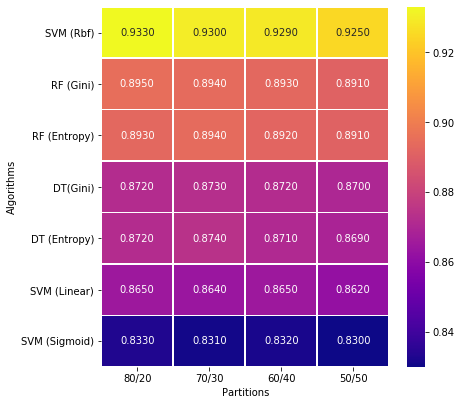

In [7]:
# Creating an arraw where columns are data splits and rows are algorithms, 
# storing their performance per split. I calculated all these in google 
# sheets where my raw code is stored.
Metric_Scores_By_Partition = np.array([[0.872, 0.874,0.871,0.869],
                                       [0.872, 0.873,0.872,0.870],
                                       [0.865, 0.864,0.865,0.862],
                                       [0.933, 0.930,0.929,0.925],
                                       [0.833, 0.831,0.832,0.830],
                                       [0.895, 0.894,0.893,0.891],
                                       [0.893, 0.894,0.892,0.891]])
                                      
# Creating labels for the rows.
labels = np.array(['DT (Entropy)', 'DT(Gini)', 'SVM (Linear)', 'SVM (Rbf)', 
                   'SVM (Sigmoid)', 'RF (Gini)', 'RF (Entropy)'])

# Sorting data for the heatmap.
order = np.argsort(np.mean(Metric_Scores_By_Partition, axis = 1))[::-1]

# Creating the heatmap.
plt.subplots(figsize = (5,5))
graph = sns.heatmap(Metric_Scores_By_Partition[order], cmap = 'plasma', 
                    annot = True, fmt = '.4f', 
                    xticklabels = ['80/20', '70/30', '60/40', '50/50'], 
                    linewidths = 0.5, cbar = True)
graph.set_yticklabels(labels[order], rotation = 360)
plt.subplots_adjust(left = 0, bottom = 0, 
                    right = 1, top = 1, 
                    wspace = 0, hspace = 0)
plt.xlabel('Partitions')
plt.ylabel('Algorithms')
plt.savefig('average_score.png', dpi = 300)